In [1]:
import pandas as pd
import torch
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# disable gradients since we're not doing any training here
torch.set_grad_enabled(False)
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.device_count()

4

In [3]:
def get_path(s):
    path = Path(ccs_paths[s])
    eval_df = pd.read_csv(path / "eval.csv")
    lr_df = pd.read_csv(path / "lr_eval.csv")
    lm_df = pd.read_csv(path / "lm_eval.csv") if (path / "lm_eval.csv").exists() else None
    return {
        "eval": eval_df,
        "lr": lr_df,
        "lm": lm_df,
    }

In [4]:
ccs_paths = {
    "small/ccs/dec/norm-full": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-small/imdb/vibrant-haslett",

    "base/ccs/dec/norm-full": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/goofy-dhawan",
    "base/ccs/dec/norm-full/2": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/funny-lehmann",
    "base/eigen/dec/norm-full": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/determined-galileo",

    "large/ccs/dec/norm-full": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-large/imdb/modest-lovelace",

    "small/ccs/dec/no-norm": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-small/imdb/elastic-heyrovsky",
    "base/ccs/dec/no-norm": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/brave-hugle",

    "base/ccs/enc/norm-full/tok-last": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/beautiful-wescoff",
    "base/ccs/enc/norm-full/tok-last/2": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/frosty-brown",
    "base/ccs/enc/norm-full/tok-last/tries-20/lr-5e-3": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/clever-clarke",
    "base/ccs/enc/norm-full/tok-last/nvariants-1": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/zen-edison",

    "base/ccs/enc/norm-full/tok-first/2": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/funny-golick",
    "base/ccs/enc/norm-full/tok-first": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/gifted-lumiere",

    "base/ccs/enc/no-norm": "/home/ec2-user/elk-reporters/allenai/unifiedqa-t5-base/imdb/serene-maxwell",
}

data = {
    path: get_path(path)
    for path in ccs_paths
}

In [5]:
def plot_component(parts, s, metric="acc"):
    fig, ax = plt.subplots(1, len(parts), figsize=(5*len(parts), 5), squeeze=False)
    for i, part in enumerate(parts):
        acc = data[part][s].loc[data[part][s]['ensembling'] == 'full', [f'{metric}_estimate', f'{metric}_lower', f'{metric}_upper']].applymap(lambda x: max(x, 1-x))
        acc.plot(title=part, ylim=(0.5, 1.0), ax=ax[0][i])
    plt.show()

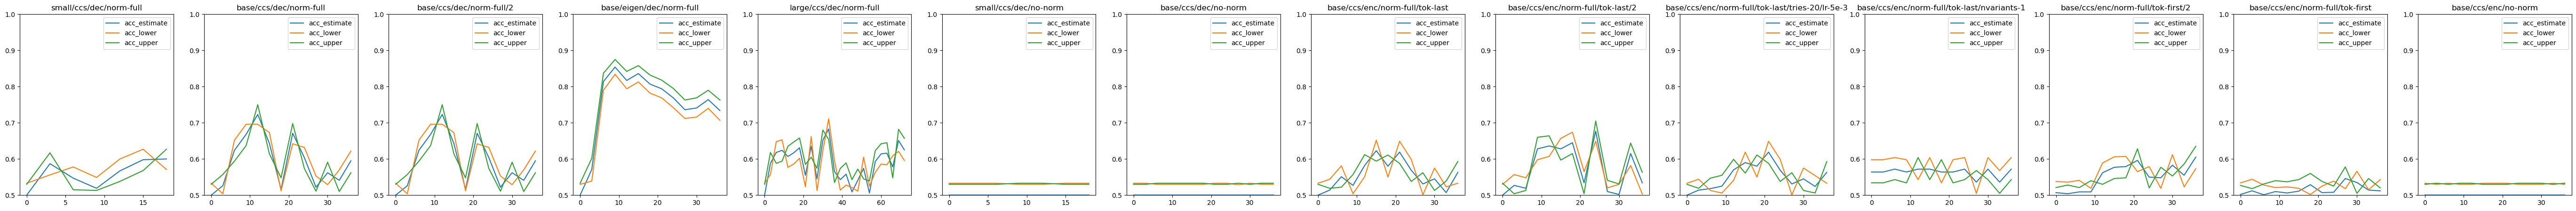

In [6]:
plot_component(list(ccs_paths.keys()), "eval")